**Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

**Import Data**

In [3]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
X = df[['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec']].values
y = df['not.fully.paid'].values

In [8]:
X_ = X[:,2:]

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
X_df = sc.fit_transform(X_)

In [11]:
scaled_df = pd.DataFrame(X_df, columns=['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'])

In [13]:
scaled_df.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003


In [14]:
scaled_df['not.fully.paid'] = df['not.fully.paid']

In [16]:
all_cols = ['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

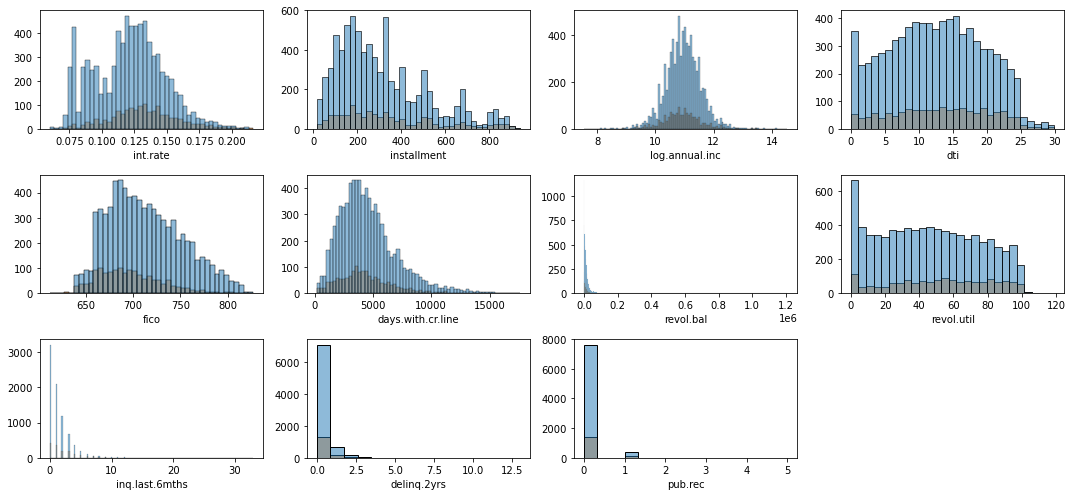

In [17]:
plt.figure(figsize=(15,7))
for i, col in enumerate(all_cols):
  i += 1
  plt.subplot(3,4,i)
  sns.histplot(data=df, x=col, hue='not.fully.paid', legend = False)
  plt.ylabel('')
  plt.tight_layout()

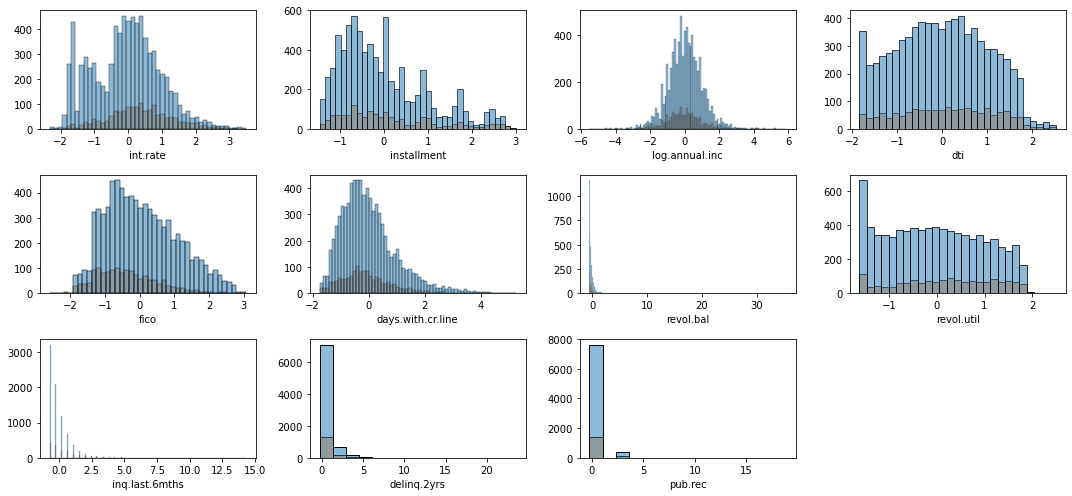

In [18]:
plt.figure(figsize=(15,7))
for i, col in enumerate(all_cols):
  i += 1
  plt.subplot(3,4,i)
  sns.histplot(data=scaled_df, x=col, hue='not.fully.paid', legend = False)
  plt.ylabel('')
  plt.tight_layout()

In [19]:
new_df = df.copy()

In [20]:
new_df['revol.bal'] = np.log(new_df['revol.bal']+1)

In [21]:
new_df['inq.last.6mths'] = np.log(new_df['inq.last.6mths']+1)

In [22]:
new_df['delinq.2yrs'] = np.log(new_df['delinq.2yrs']+1)

In [23]:
new_df['pub.rec'] = np.log(new_df['pub.rec']+1)

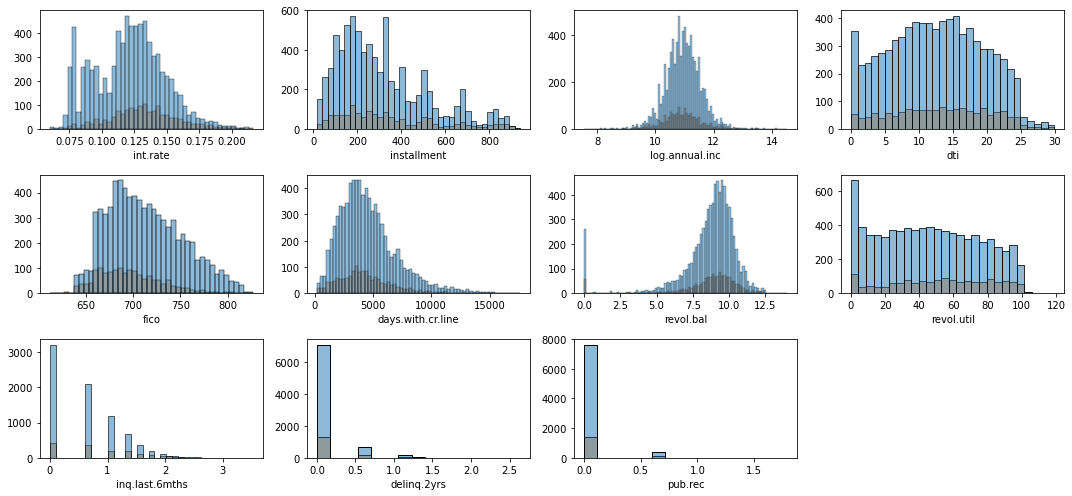

In [24]:
plt.figure(figsize=(15,7))
for i, col in enumerate(all_cols):
  i += 1
  plt.subplot(3,4,i)
  sns.histplot(data=new_df, x=col, hue='not.fully.paid', legend = False)
  plt.ylabel('')
  plt.tight_layout()

In [28]:
X = new_df[['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec']].values
y = new_df['not.fully.paid'].values

In [29]:
X.shape

(9578, 13)

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [30]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [31]:
X.shape

(9578, 19)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,8:] = sc.fit_transform(X_train[:,8:])
X_test[:,8:] = sc.transform(X_test[:,8:])

In [ ]:
#Support Vector Machine

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, probability = True)
classifier.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [35]:
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2013    1]
 [ 380    1]]


0.8409185803757829

In [37]:
_,X_test_pd,_,_ = train_test_split(df.values, y, test_size = 0.25, random_state = 0)

In [38]:
pd_pred = pd.DataFrame(y_pred, columns=['Prediction'])
pd_proba = pd.DataFrame(y_pred_proba[:,1], columns=['Probability'])
pd_X_test = pd.DataFrame(X_test_pd, columns=df.columns)
df_pred = pd.concat([pd_X_test,pd_pred,pd_proba], axis=1)

In [39]:
df_pred.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Prediction,Probability
0,1,all_other,0.1189,49.75,10.829729,16.87,687,2314.958333,962,64.1,0,0,0,0,0,0.156018
1,1,debt_consolidation,0.1221,84.12,10.203592,10.0,707,2730.041667,5630,23.0,1,0,0,0,0,0.156190
2,1,debt_consolidation,0.1695,712.54,11.918391,13.61,672,4830.041667,16473,94.1,2,2,0,0,0,0.146810
3,1,debt_consolidation,0.1739,286.78,11.189962,19.59,667,7020.0,19892,67.0,1,0,1,0,0,0.214882
4,0,credit_card,0.1312,202.51,9.392662,4.4,657,898.958333,5251,49.3,9,0,0,0,0,0.200085


<AxesSubplot:xlabel='Probability', ylabel='Count'>

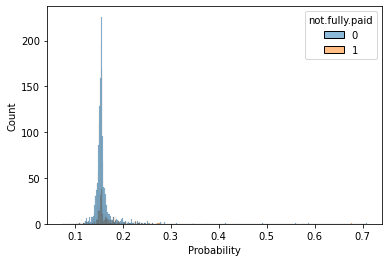

In [40]:
sns.histplot(data=df_pred, x='Probability', hue='not.fully.paid')

(0.1, 0.2)

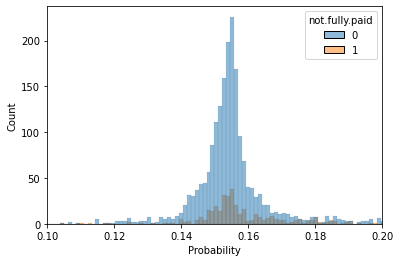

In [41]:
sns.histplot(data=df_pred, x='Probability', hue='not.fully.paid')
plt.xlim([0.1,0.2])

<AxesSubplot:xlabel='purpose', ylabel='Probability'>

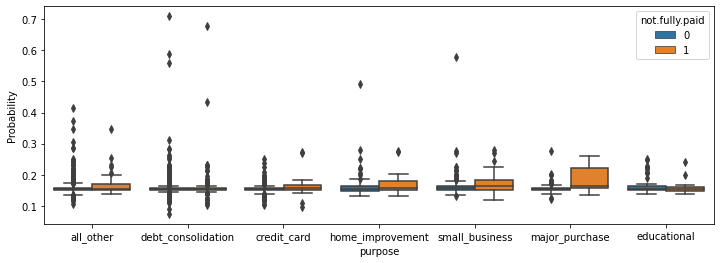

In [43]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df_pred, x='purpose', y='Probability', hue='not.fully.paid')

(0.1, 0.25)

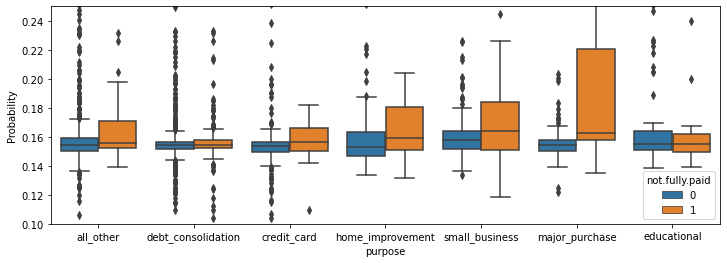

In [44]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df_pred, x='purpose', y='Probability', hue='not.fully.paid')
plt.ylim([0.1,0.25])